<a href="https://colab.research.google.com/github/e-ayeni/Github_first/blob/master/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#importing necessary packages and libraries needed

import pandas as pd #for preprocessing and analysis
from pandas import DataFrame as df
import time #tracking the speed of loading dataset and imported libraries
import numpy as np #for preprocessing and analysis/statistical calculations
import seaborn as sns #for visualizations
import plotly.express as px #for visualizations
import plotly.graph_objects as go
import matplotlib.pyplot as plt #for visualizations
%matplotlib inline
plt.show()

In [85]:
data = pd.read_csv('gdrive/My Drive/Medium Projects/Netflix Data/netflix_titles.csv')

In [86]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [87]:
data.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [89]:
data.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [90]:
data.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [91]:
data = data.dropna(subset=["date_added", "rating"])

In [92]:
data.isnull().sum()

show_id            0
type               0
title              0
director        1955
cast             567
country          471
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

<h1>Exploratory Data Analysis<h1>

<h3>Questions to Answer<h3>

1. Countries with the higheset listings, by Movies and TV Shows. What are the type of contents?
2. Which year did Netflix list the highest number of Movies & TV Shows?
3. Actor and/or director with the highest number of listings
4. Ratings that has the most listings
5. Which movie appeared in the most ratings?
6. Did Netflix upload more of children/family rated movies/shows over the years?


<h3>1. Countries with the highest contents, by Movies and TV Shows </h3>

In [11]:
high_country =data['country'].value_counts().head(10).reset_index()
high_country.rename(columns ={'index':'country_name', 'country':'no_movies/shows'}, inplace=True)
high_country = high_country.sort_values("no_movies/shows", ascending=True)

In [12]:

fig = px.bar(data, x=high_country['no_movies/shows'], y=high_country['country_name'], 
       labels={'y':'no_of_contents', 'x':'country'}, width=800, height=600, orientation="h")

fig.update_layout(title_text='Top 10 Countries with the Most Contents', title_x=0.52)

In [13]:
content_type = data['type'].value_counts().reset_index()
content_type.rename(columns={'index':'content_type', 'type':'no_of_content'}, inplace=True)
content_type


,content_type,no_of_content
0,Movie,4257
1,TV Show,1957


In [14]:


fig = px.pie(content_type, names=content_type['content_type'], values=content_type['no_of_content'], width=500, height=500, hole=.3 )

fig.update_layout(title_text="Content Type", title_x=0.47)

fig.show()

In [15]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


<h3>2. Which year did Netflix list the highest number of Movies & TV Shows? </h3>


In [16]:
#converting the data_added column to a datetime format

import datetime

data['date_added'] = pd.to_datetime(data['date_added'])

In [17]:
pd.options.mode.chained_assignment = None

data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month_name()
data['day_added'] = data['date_added'].dt.day_name()


data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,September,Monday
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,September,Friday
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,September,Saturday
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,September,Saturday
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,September,Friday


In [18]:
content = data.groupby(["type", "year_added"])["release_year"].count().reset_index()
content.head()

,type,year_added,release_year
0,Movie,2008,1
1,Movie,2009,2
2,Movie,2010,1
3,Movie,2011,13
4,Movie,2012,4


In [19]:
palette = {"Movie":"#a678de", "TV Show":"#6ad49b"}

labels = {
    "release_year":"no_of_contents",
    "year_added":"year_added"
}

fig = px.line(content, x="year_added", y="release_year", width=1000, color="type", color_discrete_map=palette, labels=labels)


fig.update_layout(title_text="Trend of Contents", title_x=0.47)

In [20]:
# plt.figure(figsize=(13,7))
# sns.set_style(style='whitegrid')
# palette = {"Movie":"#a678de", "TV Show":"#6ad49b"}

# sns.countplot(x='year_added', data=data, hue='type', palette=palette,)

# plt.title("Year Contents Were Added")

In [21]:
month = data[["month_added"]].value_counts().reset_index()
month.rename(columns={0:"number_contents"}, inplace=True)
month

,month_added,number_contents
0,December,693
1,October,646
2,November,612
3,January,609
4,March,550
5,August,508
6,September,478
7,July,474
8,April,446
9,May,428


In [22]:
#installing a library that is not in google colab


!pip install sorted-months-weekdays
!pip install sort-dataframeby-monthorweek

  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-cp36-none-any.whl size=3238 sha256=c31c5703380d875ba2a78223b1551071fdd562d6a4220c38a64d449ef1ba775f
  Stored in directory: /root/.cache/pip/wheels/11/2f/19/05e3f8e6a6d06a2e962f0a172bc9736451f6518e2db6d1ab6d
Successfully built sorted-months-weekdays
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-cp36-none-any.whl size=3438 sha256=a206f1068c936444b6c58a4c593da886476836220769f7aa3dae5eb766a6a43d
  Stored in directory: /root/.cache/pip/wheels/4c/35/02/083a8cdd13de15416e153a50324450c15189d259c861f9f964
Successfully built sort-dataframeby-monthorweek


In [23]:
from sorted_months_weekdays import *

from sort_dataframeby_monthorweek import *

In [24]:
month = Sort_Dataframeby_Month(df=month,monthcolumnname='month_added')
month

,month_added,number_contents
0,January,609
1,February,377
2,March,550
3,April,446
4,May,428
5,June,393
6,July,474
7,August,508
8,September,478
9,October,646


In [94]:
fig = px.line(month, x="month_added", y="number_contents", width=850, height=500,)

fig.update_layout(title_text="Monthly Trend of Contents Upload", title_x=0.47)

In [26]:
days = data["day_added"].value_counts().reset_index()
days.rename(columns={"day_added":"no_of_content", "index":"dayofweek"}, inplace=True)
days

,dayofweek,no_of_content
0,Friday,1909
1,Thursday,851
2,Tuesday,844
3,Wednesday,757
4,Monday,691
5,Saturday,598
6,Sunday,564


In [27]:
days = Sort_Dataframeby_Weekday(df=days, Weekdaycolumnname="dayofweek")

In [28]:
fig = px.bar(days, x="dayofweek", y="no_of_content", width=700, height=500)

fig.update_layout(title_text="Weekly Trend of Contents Upload", title_x=0.47)

<h3>3. Duration of Content Types</h3>

In [29]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,September,Monday
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,September,Friday
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,September,Saturday
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,September,Saturday
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,September,Friday


In [30]:
movie = data[data["duration"].str.contains("min")][["title", "type", "duration"]]


In [31]:
#to double check no tv show is in our new dataframe
movie["type"].value_counts()

Movie    4257
Name: type, dtype: int64

In [32]:
movie.head()

,title,type,duration
0,Norm of the North: King Sized Adventure,Movie,90 min
1,Jandino: Whatever it Takes,Movie,94 min
4,#realityhigh,Movie,99 min
6,Automata,Movie,110 min
7,Fabrizio Copano: Solo pienso en mi,Movie,60 min


In [33]:
#a function to clean our duration column and convert it to float datatype

def movie_edit(x):
  y = x.split("min")[0].strip()

  return float(y)

In [34]:
movie_edit("90 min")

90.0

In [35]:
movie["duration"] = movie["duration"].apply(movie_edit)

In [36]:
movie.head()

,title,type,duration
0,Norm of the North: King Sized Adventure,Movie,90.0
1,Jandino: Whatever it Takes,Movie,94.0
4,#realityhigh,Movie,99.0
6,Automata,Movie,110.0
7,Fabrizio Copano: Solo pienso en mi,Movie,60.0


In [37]:
# plt.figure(figsize=(13,7))

# sns.distplot(movie, x=movie["duration"])

In [38]:
labels = {
    "count":"no_of_contents",
    "duration":"duration"
}


fig = px.histogram(movie, x=movie["duration"], width=900, height=500, marginal="violin" , labels=labels)



fig.update_layout(title_text="Duration of Movies", title_x=0.47)

In [39]:
tv_shows = data[data["duration"].str.contains("Season")]["duration"].value_counts().reset_index()
tv_shows.rename(columns={"duration":"no_content", "index":"no_season"}, inplace=True)
tv_shows.head()

,no_season,no_content
0,1 Season,1319
1,2 Seasons,300
2,3 Seasons,157
3,4 Seasons,60
4,5 Seasons,45


In [40]:
def show_edit(x):
  y = x.split("Season")[0].strip() or x.split("Seasons")[0].strip()

  return int(y)

In [41]:
show_edit("2 Seasons")

2

In [42]:
tv_shows["no_season"] = tv_shows["no_season"].apply(show_edit)

In [43]:
labels={
    "no_content":"no_of_contents",
    "no_season":"no_of_season"
}

fig = px.bar(tv_shows, x="no_season", y="no_content", width=900, height=500, labels=labels)

fig.update_layout(title_text="Duration of TV Shows", title_x=0.47)

In [44]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,September,Monday
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,September,Friday
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,September,Saturday
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,September,Saturday
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,September,Friday


<h3> Ratings of Contents</h3>

Text(0.5, 1.0, 'Rating of Contents Over the Years')

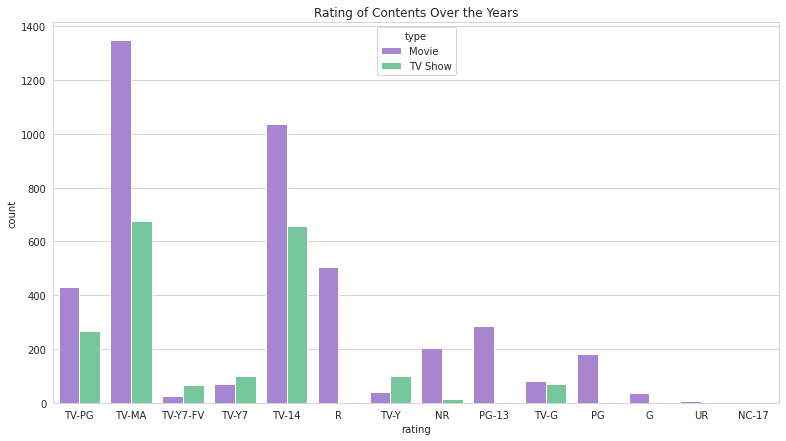

In [45]:
 plt.figure(figsize=(13,7))
 sns.set_style(style="whitegrid")
 
 
 palette = {"Movie":"#a678de", "TV Show":"#6ad49b"}

sns.countplot(data=data, x=data["rating"], hue=data["type"], palette=palette)

plt.title("Rating of Contents Over the Years")

<h3>Top content categories, actor & directors</h3>

In [46]:
!pip install git+https://git@github.com/kavgan/word_cloud.git

  Cloning https://****@github.com/kavgan/word_cloud.git to /tmp/pip-req-build-hhfifzf2
  Running command git clone -q 'https://****@github.com/kavgan/word_cloud.git' /tmp/pip-req-build-hhfifzf2
  Created wheel for word-cloud: filename=word_cloud-0.0.0-cp36-none-any.whl size=5892 sha256=fdaac03ebb6fb15735340dd6f170684a3e46669f55bc48a3901b6291cc05b3da
  Stored in directory: /tmp/pip-ephem-wheel-cache-vk37jueh/wheels/d6/98/5f/8e001af2b4fb7852176a75f82de076b6515ee0fd298416fd01
Successfully built word-cloud


In [47]:
from wordcloud import WordCloud, STOPWORDS

In [48]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(13, 8))

  

Top Categories

(-0.5, 1919.5, 1079.5, -0.5)

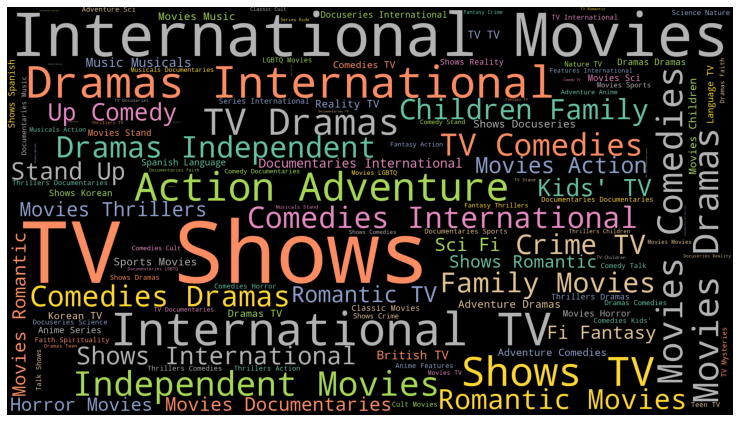

In [49]:
wordcloud = WordCloud(width = 1920, height= 1080,colormap='Set2', 
                      background_color="black", stopwords="STOPWORDS", max_words=150,).generate(' '.join(data.listed_in))
plot_cloud(wordcloud)
plt.imshow(wordcloud)
plt.axis("off")




In [50]:
# wordcloud = WordCloud(width = 1500, height = 1000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(str(text))
# plot_cloud(wordcloud)
# plt.imshow(wordcloud)

Top Actors

In [51]:
data["director"].value_counts()

Raúl Campos, Jan Suter         18
Marcus Raboy                   14
Jay Karas                      13
Jay Chapman                    12
Steven Spielberg                9
                               ..
Elizabeth Chai Vasarhelyi       1
Abhay Chopra                    1
Noah Baumbach, Jake Paltrow     1
Doug Hamilton                   1
Stephen Amezdroz                1
Name: director, Length: 3298, dtype: int64

In [52]:
data.isnull().sum()

show_id            0
type               0
title              0
director        1955
cast             567
country          471
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
year_added         0
month_added        0
day_added          0
dtype: int64

In [53]:
#fillig null values to allow for word cloud as it doesn't not allow for null values which is treated as floats

data[["director", "cast"]] = data[["director", "cast"]].fillna("Not Available")

In [54]:
data.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         471
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
year_added        0
month_added       0
day_added         0
dtype: int64

In [55]:
# stop_words = ["Not Available", "Available"] + list(STOPWORDS)

# wordcloud = WordCloud(width = 1920, height= 1080,colormap='Set2', stopwords=stop_words).generate(' '.join(data.director))
# plot_cloud(wordcloud)
# plt.imshow(wordcloud)

Top Directors

In [56]:
director = data["director"].value_counts().reset_index()
director = director.drop(director.index[0])
director.head()

,index,director
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,14
3,Jay Karas,13
4,Jay Chapman,12
5,Martin Scorsese,9


In [57]:
director_dict = dict(zip(director["index"], director["director"]))

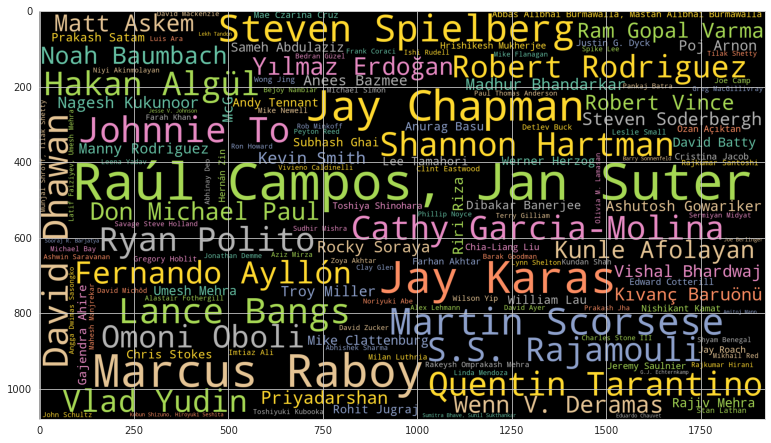

In [58]:
stop = ["Not Available", "Available"] + list(STOPWORDS)

wordcloud = WordCloud(width = 1920, height= 1080,colormap='Set2', stopwords=stop, max_words=150,).generate_from_frequencies(director_dict)
plot_cloud(wordcloud)
plt.imshow(wordcloud)

In [59]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,September,Monday
1,80117401,Movie,Jandino: Whatever it Takes,Not Available,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,September,Friday
2,70234439,TV Show,Transformers Prime,Not Available,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,September,Saturday
3,80058654,TV Show,Transformers: Robots in Disguise,Not Available,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,September,Saturday
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,September,Friday
